In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bmm import MVBetaMM

In [3]:
# Random State
random_state = np.random.RandomState(42)

# Parameters for the beta distributions
alpha = [2, 30, 11, 6]          # Alpha parameters
beta = [14, 30, 4, 6]           # Beta parameters
weights = [0.1, 0.2, 0.3, 0.4]  # Custom weights for each distribution
num_samples = 1000000              # Number of samples to generate

# Set random state for reproducibility
random_state = np.random.RandomState(42)

# Generate data from beta distributions based on weights
data = []
for a, b, weight in zip(alpha, beta, weights):
    num_samples_dist = int(num_samples * weight)
    samples = random_state.beta(a, b, num_samples_dist)
    data.append(samples)

# Make it into a row vector
X = np.concatenate(data).reshape(-1, 1)

"""# Plot the data
sns.kdeplot(X)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Smooth Density Estimation of Beta Distributions (Custom Weights)')
plt.show()"""

"# Plot the data\nsns.kdeplot(X)\nplt.xlabel('Value')\nplt.ylabel('Density')\nplt.title('Smooth Density Estimation of Beta Distributions (Custom Weights)')\nplt.show()"

In [4]:
bmm = MVBetaMM(4)
bmm.fit(X, max_iter=10)

(1000000, 4)
(1000000, 1)
(1000000, 4)
(1000000, 1)
(1000000, 4)
(1000000, 1)
(1000000, 4)
(1000000, 1)
(1000000, 4)
(1000000, 1)
(1000000, 4)
(1000000, 1)
(1000000, 4)
(1000000, 1)
(1000000, 4)
(1000000, 1)
(1000000, 4)
(1000000, 1)
(1000000, 4)
(1000000, 1)


In [17]:
print(bmm.params_)
print(bmm.weights_)

[[29.25747781 29.26021691]
 [10.27059039  3.91622571]
 [ 1.99888885 13.95815871]
 [ 6.13699824  6.38183913]]
[0.205749   0.32821749 0.10016005 0.36587346]


In [13]:
classes = bmm.predict_class(X)

In [15]:
total_elements = 1e6

# Define the percentages for each number
percentage_2 = 0.1
percentage_1 = 0.2
percentage_3 = 0.3
percentage_0 = 0.4

# Calculate the number of elements for each percentage
num_elements_2 = int(total_elements * percentage_2)
num_elements_1 = int(total_elements * percentage_1)
num_elements_3 = int(total_elements * percentage_3)
num_elements_0 = int(total_elements * percentage_0)

# Create an array with the specified distribution
arr = np.concatenate((
    np.full(num_elements_2, 2),
    np.full(num_elements_1, 1),
    np.full(num_elements_3, 3),
    np.full(num_elements_0, 0)
))

np.mean(np.not_equal(arr, classes))

0.768587

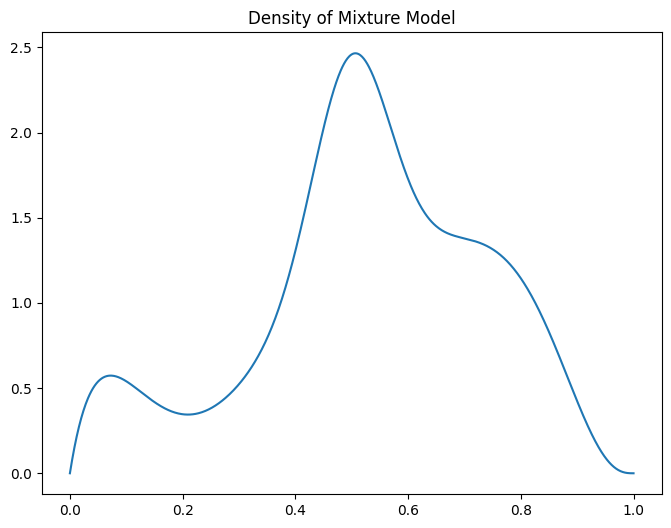

In [16]:
import matplotlib.pyplot as plt
from scipy.stats import beta

x = np.linspace(0, 1, 1000) # Points at which to evaluate the density
mixture_density = np.zeros_like(x)
for i in range(bmm.n_components):
    a, b = bmm.params_[i, :bmm.n_components]
    mixture_density += bmm.weights_[i] * beta.pdf(x, a, b)

plt.figure(figsize=(8, 6))
plt.plot(x, mixture_density)
plt.title('Density of Mixture Model')
plt.show()


In [26]:
from scipy.stats import beta

X = np.array([[0.5, 0.9], [0.48, 0.83]])
beta.logpdf(X, [100, 1], [100, 9])

array([[  2.42211734, -16.22345617],
       [  2.26359048, -11.97843016]])